# Lab - Module 6

In [1]:
% matplotlib inline

## Exploratory Data Analysis

In this Module, we partitioned our problem using a Taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Box-and-Whiskers Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

We also mentioned that we might need to apply both modes and several different charts to uncover various relationships in our data.

The goal for this lab is to get you acquainted with most of these tools in both their ideal setting and in the less than ideal setting. In a previous Lab, you learned how to generate synthetic data. You're going to put that skill to good use. You will be generating data from various distributions: bi/multinomial, normal, poisson, exponential, etc. 

In general, we want to see how well the various modes work, especially the graphical modes, when:

1. You have a lot of perfect data. For example, what does a histogram look like when you sample from a normal distribution with $\mu=32.5$ and $v=25\%$ with 10,000 observations?
2. You have either imperfect data or not a lot of it. Now what happens when you have $v=1\%$ and 62 observations? What happens when there is a hidden variable that makes your data $X_1$ the combination of $\mu_1=32.5$, $v_1=5\%$ and $\mu_2=34.2$ and $v=3\%$?

Not only will these get you acquainted with the various techniques but it will also demonstrate just how important domain knowledge is.

And for each case, try different modes. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes?

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

sns.set(style="whitegrid")

## Guided Example

Assume you have data for a numerical variable $X_1$ with following (unknown to you) characteristics:

$\mu=32.5$

$v=25\%$ (remember this is the **coefficient of variation** not the variance)

We're going to start off easy:

1. Calcualte the descriptive statistics.
2. Plot a histogram with default bins.
3. Make a box and whiskers plot with a data overlay.

with $n$ = 50.

**Step 1. Generate the synthetic data. For real EDA, this step is obtain and clean the data.**

We can use the `to_std` function from past Labs to convert the coefficient of variation to a standard deviation.

In [3]:
def to_std( mu, v):
    return mu * v

Set the random seed for this experiment.

In [4]:
np.random.seed([17246465])

It's very convenient to have our data in a Panda's DataFrame:

In [5]:
mu = 32.5
s = to_std( mu, 0.25)

data = pd.DataFrame({"x1": np.random.normal( mu, s, 50)})

**Step 2. Summaries and Charts**

Everything in italics is like a voiceover explanation of why you're doing something...it's not something you would put in an actual report.

*The data is synthetic but it doesn't matter. These techniques are like little machines that take data in and spit something out, a chart or a descriptive statistic. The interesting part for right now is that you know where the data came from. When you do this for real, you won't know The Truth at all.*

*Let's start with "x1" which is "$x_1$ with coefficient of variation equal to 25 percent". Let's imagine that this was 50 data points that we just collected somehow and that we have already cleaned them. The first thing we want to do is get sense for our data which might involve just printing out the usual parameteric and non-parametric descriptive statistics.*

*Of course, in the real world, you kind of have to say something about why your doing this and interpret the results. Here we can go with a little bit of boiler plate.*

$x_1$ is an important variable to this problem. We start our analysis with descriptive statistics:

In [6]:
data["x1"].describe()

count    50.000000
mean     31.752356
std       9.551102
min       5.195836
25%      27.228962
50%      31.649145
75%      37.528273
max      52.767789
Name: x1, dtype: float64

The mean is 31.75 with a standard deviation of 9.55 (a coefficient of variation of 30.0%). The mean and median are about the same 31.75 versus 31.65 which suggests a symmetric distribution. The range is 47.57. The interquartile range is 10.29.

*For a real variable, we'd have context (domain knowledge) for those values. Is the mean what we expected? Is it high or low? Is that a big range? You also need to be inquisitive. If you just copy the sentences above for the rest of this assignment, you've missed the point. You need to **explore** and I can't enumerate all the possible ways you can do that. You need to forget a little bit about how the data came to be and just look at it.*

The descriptive statistics for $x_1$ will not necessarily show the whole story so we're going to plot a histogram of the data:

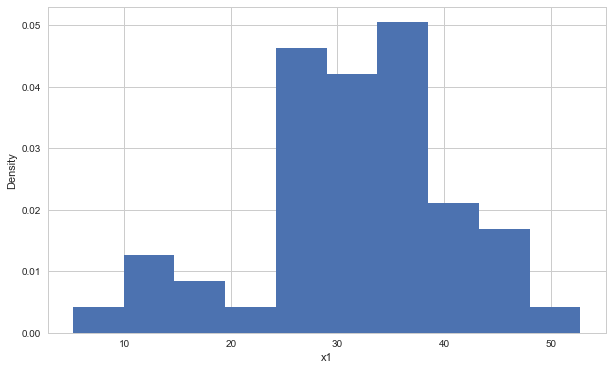

In [7]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist( data[ "x1"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "x1")

plt.show()
plt.close()

While the mean and median are the nearly the same, suggesting a normal distribution, the histogram does not seem to indicate that the data is normally distributed. While there is a peak around 32.5, around the mean, the left hand side of the distribution seems to be missing, although with a small peak. We might need to get more data to ascertain what would be a good distributional model for this data.

*At this point, you should fiddle around with the bin sizes a bit. It might reveal more structure to the data.*

*Make sure you change variable names when you copy and paste code from other sources or previous notebooks*

We're going to take a different view of the data's distributional shape by plotting a box-and-whisker's chart with the actual data overplotted:

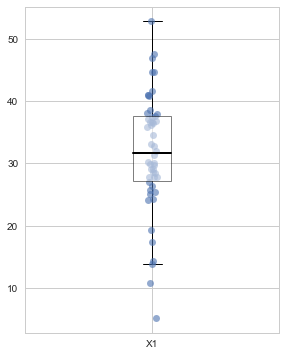

In [8]:
def restyle_boxplot( patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)
    
    for box in patch["boxes"]:
        box.set( facecolor='#FFFFFF', alpha=0.5)
    
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)

patch = axes.boxplot( data[ "x1"], labels=["X1"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["x1"]))
axes.plot(x, data[ "x1"], 'o', alpha=0.6)

plt.show()
plt.close()

The box-and-whisker's chart is fairly well balanced, the median is near the middle of the box. The non-parametric statistics (Q1, median, Q3) suggest a fairly normal distribution. Although there appear to be several extreme values at the lower end of the distribution.

*Box-and-whisker plots when they include the data are very nice in many cases for showing how the data corresponds to the summary statistics. The top of the whisker is $1.5 \times IQR$, the bottom of the whisker is $1.5 \times IQR$. The top of the box is `75%` (3rd quartile) and the bottom of the box is `25%` (1st quartile). The line in the box is the median (`50%`). They are also very nice for comparing many distributions, especially for each value of another categorical variable.*

*As mentioned in the Text, there is no generally accepted definition of "outlier" so we use the term, "extreme value". These may require some special investigation.*

## Exercises

For all exercises, you should:

1. Calculate parametric and non-parametric descriptive statistics,
2. Plot several histograms with different bins sizes.
3. Plot a box-and-whiskers chart with and without overlaying the actual data points.

Always describe what you're doing, why and the result.

**Experiment 1**

Repeat the Guided Example but change the random seed. What happened?

In [9]:
np.random.seed([0])

In [10]:
mu = 32.5
s = to_std(mu, 0.25)

data1 = pd.DataFrame({'x': np.random.normal(mu, s, 50)})

In [11]:
data1['x'].describe()

count    50.000000
mean     33.019365
std       7.813062
min      11.752591
25%      27.580032
50%      32.598609
75%      38.467145
max      53.216235
Name: x, dtype: float64

The mean is 33.02 with a standard deviation of 7.81, both different than the guided example. The median is 32.60 and fairly close to the mean. The range is 41.46, much smaller than the guided example, which suggests fewer "extreme values". The interquartile range is 10.89 and larger than 10.29.

Create a function to generate the bins according to Freedman-Diaconis' rules.

In [12]:
def freedman_diaconis(data):
    quartiles = stats.mstats.mquantiles(data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[0]
    n = len(data)
    h = int(2.0 * (iqr/n**(1.0/3.0)))
    #print(h)
    return h

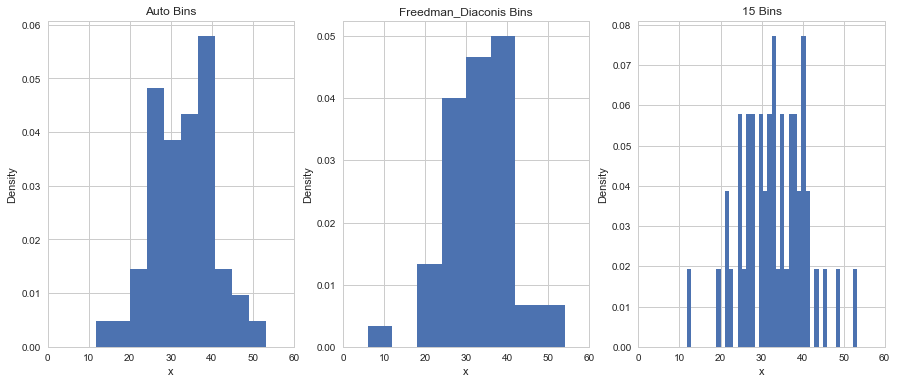

In [49]:
data = data1

figure = plt.figure(figsize=(15, 6))

#manually decide the range of x axis
xmin, xmax = 0, 60

axes = figure.add_subplot(1, 3, 1)
axes.hist(data['x'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('Auto Bins')

h = freedman_diaconis(data['x'])
bins = [xmin + i for i in range(0, xmax-xmin, h)]
axes = figure.add_subplot(1, 3, 2)
axes.hist(data['x'], bins=bins, normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('Freedman_Diaconis Bins')

#bins = [xmin + i for i in range(0, xmax-xmin, int((xmax-xmin)/15))]
axes = figure.add_subplot(1, 3, 3)
axes.hist(data['x'], bins=40, normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('15 Bins')

plt.show()
plt.close()

Three histograms with different bins are created -- automatic bins, Freedman_Diaconis bins and 15 bins. It appears that the three histograms have similiar shapes and all suggest the data is normally distributed. Only the latter two charts show a bin with no data on left hand side of the distribution.

To see the box and whiskers plot with and without a data overlay.

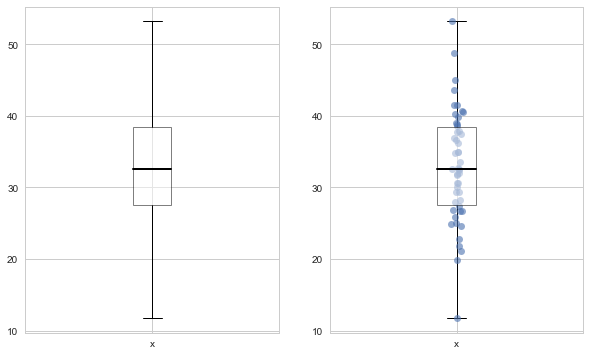

In [14]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot(data['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot(data['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x']))
axes.plot(x, data['x'], 'o', alpha=0.6)

plt.show()
plt.close()

Two box-and-whisker's charts are created -- one without the data overlaying and one with. It's obvious that the data is fairly well balanced. The interquartile range is equidistant to the median. Compared to the guided example, there are no "extreme values" beyond the whiskers.

** Experiment 2 **

Repeat the Guided Example with 1,000 observations. What happened?

In [15]:
np.random.seed([17246465])

In [16]:
mu = 32.5
s = to_std(mu, 0.25)

data2 = pd.DataFrame({'x': np.random.normal(mu, s, 1000)})

In [17]:
data2['x'].describe()

count    1000.000000
mean       32.469352
std         8.106595
min         5.195836
25%        27.193502
50%        32.504833
75%        37.930770
max        56.091901
Name: x, dtype: float64

The mean is 32.57, very close the true mean of 32.5. The standard deviation of 8.23 thus the coefficient of variation $v$ is 25.3%, extremely close to the true value. Both statistics are better than the guided example and show the positive sample size effect. The median is 32.67. The quartiles are near symmetric.

To plot the histogram.

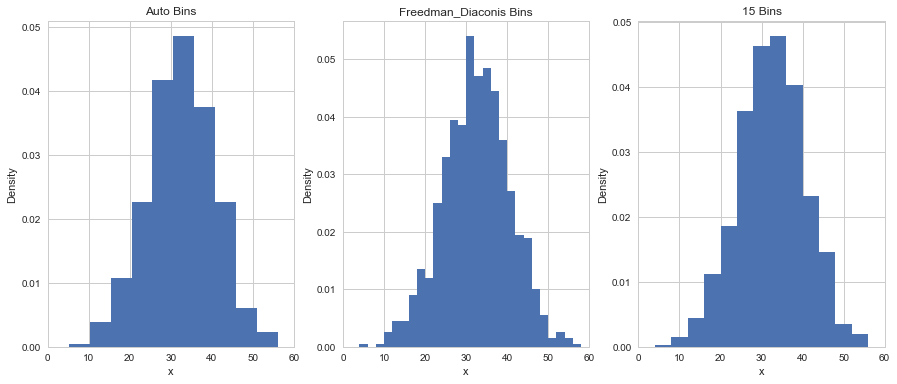

In [18]:
data = data2

figure = plt.figure(figsize=(15, 6))

#manually decide the range of x axis
xmin, xmax = 0, 60

axes = figure.add_subplot(1, 3, 1)
axes.hist(data['x'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('Auto Bins')

h = freedman_diaconis(data['x'])
bins = [xmin + i for i in range(0, xmax-xmin, h)]
axes = figure.add_subplot(1, 3, 2)
axes.hist(data['x'], bins=bins, normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('Freedman_Diaconis Bins')

bins = [xmin + i for i in range(0, xmax-xmin, int((xmax-xmin)/15))]
axes = figure.add_subplot(1, 3, 3)
axes.hist(data['x'], bins=bins, normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('15 Bins')

plt.show()
plt.close()

Three histograms with different bins are created -- automatic bins, Freedman_Diaconis bins and 15 bins. All three share a similar shape and suggest the data is normally distributed. The middle chart with Freedman_Diaconis bins, however, shows many more bins compared to the other two and thus reveals more details about the data on a more granular scale. Personally I think it is not the best. For a general insight into the distribution, the auto bins or 15 bins are sufficient and clear.

To plot the box and whiskers chart with and without a data overlay.

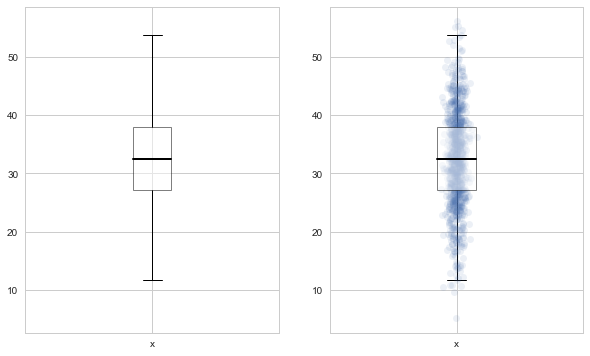

In [19]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot(data2['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot(data2['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.02, size=len(data2['x']))
axes.plot(x, data2['x'], 'o', alpha=0.1)

plt.show()
plt.close()

The first box-and-whisker's chart without data overlay indicates the data is fairly well balanced since the caps and box edges are equidistant to the median.

However, the second chart is overwhelmed by too many data points overlaid. It can be seen there are many observations from around 20 to 45 as the color is pretty dark all over that range. This overplotting may somehow fail the point of showing distribution. Note alpha has been set to 0.1.

**Experiment 3**

Repeat the Guided Example with 1,000 observations but with $v=50\%$. What happened?

In [20]:
np.random.seed([273652])

In [21]:
mu = 32.5
s = to_std(mu, 0.5)

data3 = pd.DataFrame({'x': np.random.normal(mu, s, 1000)})

In [22]:
data3['x'].describe()

count    1000.000000
mean       33.025260
std        16.370719
min       -27.516294
25%        22.144283
50%        32.710046
75%        44.271415
max        81.665689
Name: x, dtype: float64

The mean is 32.96, fairly close to the true mean of 32.5. The median is 32.64 and close to the mean. The interquartile range is near symmetric. The min and max, however, are further away than the guided example, which shows the effect of a large variance. The standard deviation of 16.4 thus the coefficient of variation  $v$ is 49.7%.

To plot the histogram.

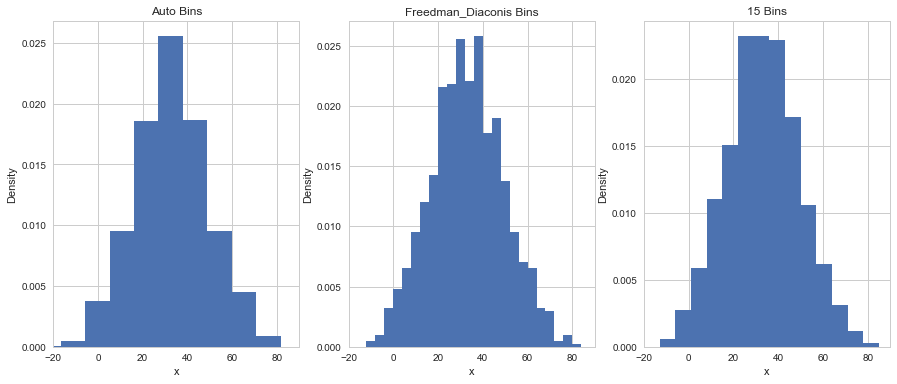

In [23]:
data = data3

figure = plt.figure(figsize=(15, 6))

#manually decide the range of x axis
xmin, xmax = -20, 90

axes = figure.add_subplot(1, 3, 1)
axes.hist(data['x'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('Auto Bins')

h = freedman_diaconis(data['x'])
bins = [xmin + i for i in range(0, xmax-xmin, h)]
axes = figure.add_subplot(1, 3, 2)
axes.hist(data['x'], bins=bins, normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('Freedman_Diaconis Bins')

bins = [xmin + i for i in range(0, xmax-xmin, int((xmax-xmin)/15))]
axes = figure.add_subplot(1, 3, 3)
axes.hist(data['x'], bins=bins, normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x')
axes.set_xlim(xmin, xmax)
axes.set_title('15 Bins')

plt.show()
plt.close()

All three share a similar shape and suggest the data is normally distributed. This time the x axis range has to be extended (-20 to 90) to cover all data. The middle chart with Freedman_Diaconis bins again has too many bins compared to the other two.

To plot the box and whiskers chart with and without a data overlay.

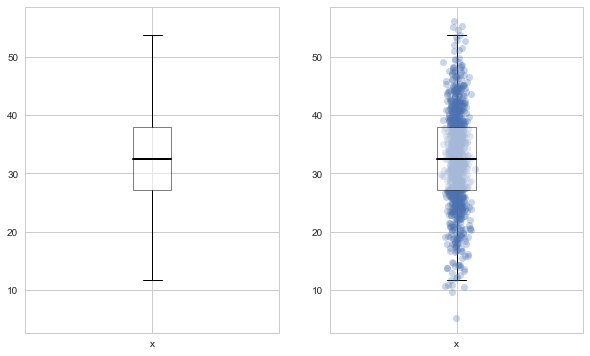

In [24]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot(data2['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot(data2['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.02, size=len(data2['x']))
axes.plot(x, data2['x'], 'o', alpha=0.3)

plt.show()
plt.close()

The first box-and-whisker's chart without data overlay indicates the data is fairly well balanced since the caps and box edges are equidistant to the median. The second chart is again overplotted. There are some "extreme values" in this case. One shortcoming of box-and-whisker's is that it does not show variance.

** Experiment 4**

Assume you have data for a numerical variable $x_2$ with the following characteristics:

$\mu_1=32.5$ and $\mu_2=34.2$

$v_1=10\%$ and $v_2=5\%$

This is *mixed* data. You're going to create $n_1$ observations with the first set of parameters and $n_2$ observations with the second set of parameters and lump them together. You can think of this data as having another variable that influences the result, $x_3$, that you may or may not know about.

You're going to calculate 3 different versions of $x_2$.

1. $n_1$ = 150 and $n_2$ = 150
2. $n_1$ = 250 and $n_2$ = 50
3. $n_1$ = 50  and $n_2$ = 250

What are the results? Under what conditions can you tell that $x_3$ exists and has an influence and under what circumstances can you not tell? These are the kinds of things you want to experiment with.

In [25]:
np.random.seed([2736523])

$n_1$ = 150 and $n_2$ = 150

In [26]:
n1  = 150
n2 = 150

mu = 32.5
s = to_std(mu, 0.1)
temp1 = pd.DataFrame({'x': np.random.normal(mu, s, n1)})

mu = 34.2
s = to_std(mu, 0.05)
temp2 = pd.DataFrame({'x': np.random.normal(mu, s, n2)})

mixed1 = pd.concat([temp1, temp2], ignore_index=True)

$n_1$ = 250 and $n_2$ = 50

In [27]:
n1  = 250
n2 = 50

mu = 32.5
s = to_std(mu, 0.1)
temp1 = pd.DataFrame({'x': np.random.normal(mu, s, n1)})

mu = 34.2
s = to_std(mu, 0.05)
temp2 = pd.DataFrame({'x': np.random.normal(mu, s, n2)})

mixed2 = pd.concat([temp1, temp2], ignore_index=True)

$n_1$ = 50  and $n_2$ = 250

In [28]:
n1  = 50
n2 = 250

mu = 32.5
s = to_std(mu, 0.1)
temp1 = pd.DataFrame({'x': np.random.normal(mu, s, n1)})

mu = 34.2
s = to_std(mu, 0.05)
temp2 = pd.DataFrame({'x': np.random.normal(mu, s, n2)})

mixed3 = pd.concat([temp1, temp2], ignore_index=True)

To see the descriptive statistics of the three cases.

In [29]:
print('mixed1\n-----------')
print(mixed1['x'].describe())
print('mixed2\n-----------')
print(mixed2['x'].describe())
print('mixed3\n-----------')
print(mixed3['x'].describe())

mixed1
-----------
count    300.000000
mean      33.486345
std        2.811922
min       23.078313
25%       31.969127
50%       33.606318
75%       35.342857
max       42.760220
Name: x, dtype: float64
mixed2
-----------
count    300.000000
mean      32.554809
std        3.144755
min       22.023810
25%       30.392163
50%       33.002951
75%       34.853588
max       40.959731
Name: x, dtype: float64
mixed3
-----------
count    300.000000
mean      33.963325
std        2.059654
min       26.649384
25%       32.845904
50%       34.143746
75%       35.424678
max       41.817097
Name: x, dtype: float64


The mean is 33.49, 32.55 and 33.96. As can be expected, the more data from $\mu_1=32.5$ the lower the mean -- mixed2. The same stands for the median. On the other hand, the more data from $\mu_1=32.5$ the higher the standard deviation (coefficient of variation), as in the case of mixed2. The range is largest for mixed1 -- 19.76, then mixed2 -- 18.98, and mixed3 -- 15.17.

To plot the histogram of these three.

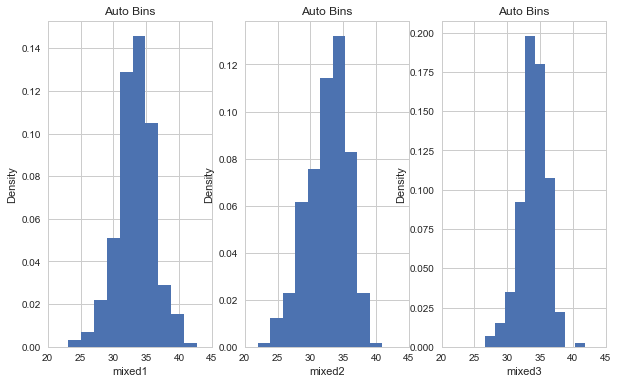

In [30]:
figure = plt.figure(figsize=(10, 6))

#manually decide the range of x axis
xmin, xmax = 20, 45

data = mixed1
axes = figure.add_subplot(1, 3, 1)
axes.hist(data['x'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('mixed1')
axes.set_xlim(xmin, xmax)
axes.set_title('Auto Bins')

data = mixed2
axes = figure.add_subplot(1, 3, 2)
axes.hist(data['x'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('mixed2')
axes.set_xlim(xmin, xmax)
axes.set_title('Auto Bins')

data = mixed3
axes = figure.add_subplot(1, 3, 3)
axes.hist(data['x'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('mixed3')
axes.set_xlim(xmin, xmax)
axes.set_title('Auto Bins')

plt.show()
plt.close()

All three share a similar shape and suggest the data is normally distributed. It also reflects a thinner distribution and higher density for mixed3, meaning the data in mixed3 has a lower variance. However, it does not reveal much beyond the descriptives.

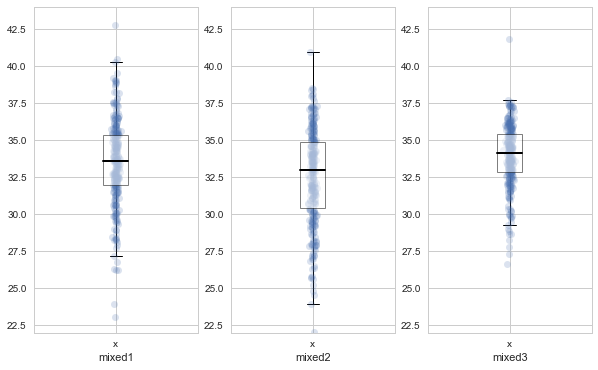

In [31]:
figure = plt.figure(figsize=(10, 6))

data = mixed1
axes = figure.add_subplot(1, 3, 1)
patch = axes.boxplot(data['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x']))
axes.plot(x, data['x'], 'o', alpha=0.2)
axes.set_xlabel('mixed1')
axes.set_ylim(22, 44)

data = mixed2
axes = figure.add_subplot(1, 3, 2)
patch = axes.boxplot(data['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x']))
axes.plot(x, data['x'], 'o', alpha=0.2)
axes.set_xlabel('mixed2')
axes.set_ylim(22, 44)

data = mixed3
axes = figure.add_subplot(1, 3, 3)
patch = axes.boxplot(data['x'], labels=["x"], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x']))
axes.plot(x, data['x'], 'o', alpha=0.2)
axes.set_xlabel('mixed3')
axes.set_ylim(22, 44)

plt.show()
plt.close()

The box-and-whisker's charts indicate mixed1 and mixed3 are near normal distribution while mixed2 has the median higher than the average. By normalizing the y axis, the values can be easily compared, mixed3 > mixed1 > mixed2. Although mixed3 shows a central and narrorwer interquartile range, it does have some "extreme values" in this case. Clearly this chart is more revealing than the histogram.

** Experiment 5**

Suppose you have two variables, $x_1$ and $x_2$, that are related. We can suppose they have a linear relationship characterized as follows:

$x_2 = 25.0 + 1.93 x_1 + \epsilon$

$x_1$ is normally distributed with $\mu= 7.5$ and $\sigma = 2.7$.

Additionally, there is random *noise* (other unknown factors) that we will call $\epsilon$ that is normally distributed with $\mu=0$ and $\sigma=1.5$. The steps to generate $x_2$ would be:

1. Generate $x_1$
2. Generate $\epsilon$
3. Combine $x_1$ and $\epsilon$ according to the formula above to create $x_2$.

Generate 1000 values of $x_2$ (and thus $\epsilon$ and $x_1$).

1. Calculate parameteric and non-parametric descriptive statistics as well as correlation coefficents for $x_1$ and $x_2$.
2. Plot histograms for $x_1$ and $x_2$
3. Plot box plots for $x_1$ and $x_2$.
3. Plot a Scatter plot for $x_1$ v. $x_2$.
4. Find out how to add a trendline to the plot.

In [32]:
np.random.seed([84758925])

In [33]:
data = pd.DataFrame({'x1': np.random.normal(7.5, 2.7, 1000)})
data['e'] = np.random.normal(0, 1.5, 1000)

data['x2'] = 25.0 + 1.93 * data['x1'] + data['e']
data.head()

,x1,e,x2
0,10.146770,-1.071677,43.511589
1,8.220144,0.391209,41.256087
2,10.756802,0.223169,45.983797
3,11.822722,-2.053288,45.764566
4,3.355420,-0.300180,31.175781


In [34]:
data.describe()

,x1,e,x2
count,1000.000000,1000.000000,1000.000000
mean,7.523605,-0.034899,39.485658
std,2.735297,1.485761,5.471262
min,-3.471656,-4.474956,18.657161
25%,5.615974,-1.044121,35.912399
50%,7.555200,0.014374,39.628354
75%,9.338128,0.991669,43.100224
max,16.079531,4.440838,57.594404


Pearson's $r$ correlationc coefficient between x1 and x2

In [35]:
print("r=", stats.pearsonr(data['x1'], data['x2'])[0])

r= 0.962425416989


This number indicates a strong positive linear relationship between x1 and x2.

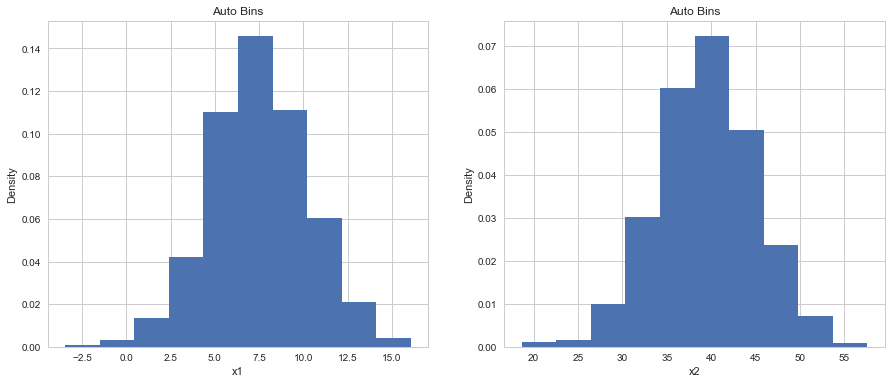

In [36]:
figure = plt.figure(figsize=(15, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(data['x1'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x1')
axes.set_title('Auto Bins')

axes = figure.add_subplot(1, 2, 2)
axes.hist(data['x2'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x2')
axes.set_title('Auto Bins')

plt.show()
plt.close()

The histogram indicates both data are normally distributed. The distributions are similar to each other but the identical. It could be because there is other factors affecting the relationship.

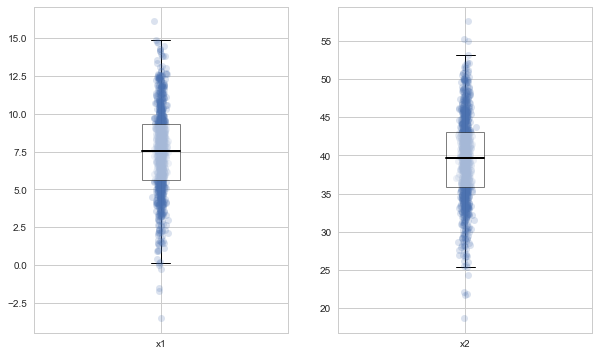

In [37]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot(data['x1'], labels=['x1'], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x1']))
axes.plot(x, data['x1'], 'o', alpha=0.2)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot(data['x2'], labels=['x2'], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x2']))
axes.plot(x, data['x2'], 'o', alpha=0.2)

plt.show()
plt.close()

The box-and-whisker's again indicates a similar distribution between x1 and x2. Combined with the correlation r, it can be inferred that x2 is positively related to a certain number n (>1) times x1.

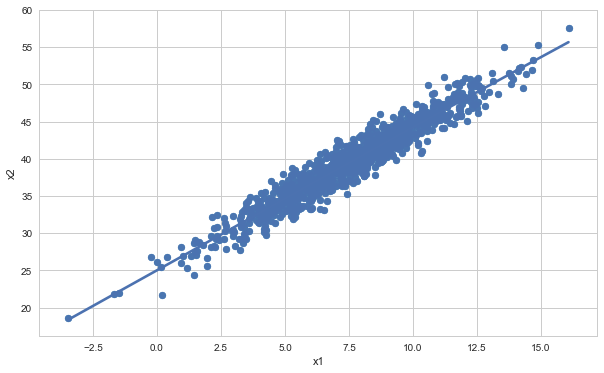

In [38]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(data['x1'], data['x2'], marker="o", color="steelblue")
sns.regplot(x="x1", y="x2", data=data, lowess=True)
axes.set_ylabel('x2')
axes.set_xlabel('x1')
plt.show()
plt.close()

The scatter plot between two numerical variables x1 and x2 implies a positive linear relationship. The LOESS trendline confirms it since the line is almost straight throughout.

There are a number of things we could do to the previous experiment to complicate it (including combining them):

1. Increase or decrease $\epsilon$.
2. Increase or decrease the available data.
3. Assume there is a hidden variable, $x_3$ that is categorical (with only two values). The probability of $x_3=1$ is $p=0.39$. When $x_3=1$, then you have the equation above but when $x_3 = 0$ you have:

$x_2 = 25.0 - 4.21 x_1 + \epsilon$.

**Experiment 6**

Add $x_3$ as discussed above in #3 using the original $\epsilon$ and $n$ assuming you know $x_3$ and have the data. You will:

1. Generate 1000 values of $x_1$
2. Generate 1000 values of $x_3$
3. Generate 1000 values of $\epsilon$
4. Generate $x_2$ based on the two formulas.

Assuming $x_1$, $x_2$ and $x_3$ are your data set,

1. Calculate parameteric and non-parametric descriptive statistics as well as correlation coefficents for $x_1$ and $x_2$.
2. What is the frequency distribution of $x_3$?
3. Plot histograms for $x_1$ and $x_2$
4. Plot box plots for $x_1$ and $x_2$ as well as $x_2$ by value of $x_3$.
5. Plot a Scatter plot for $x_1$ v. $x_2$.
6. Find out how to add a trendline to the plot.

In [39]:
np.random.seed([84758925])

In [40]:
data = pd.DataFrame({'x1': np.random.normal(7.5, 2.7, 1000)})
data['x3'] = [1 if np.random.rand() <= 0.39 else 0 for _ in range(1000)]
data['e'] = np.random.normal(0, 1.5, 1000)

#data['x2'] = [(25.0+1.93*data['x1']+data['e']) if data['x3']==1 else (25.0-4.21*data['x1']+data['e'])]
for i in range(1000):
    if (data.loc[i, 'x3']==1):
        data.loc[i, 'x2'] = 25.0 + 1.93 * data.loc[i, 'x1'] + data.loc[i, 'e']
    else:
        data.loc[i, 'x2'] = 25.0 - 4.21 * data.loc[i, 'x1'] + data.loc[i, 'e']

data.head(10)

,x1,x3,e,x2
0,10.146770,0,-0.127666,-17.845567
1,8.220144,1,-1.052661,39.812217
2,10.756802,1,1.148705,46.909332
3,11.822722,0,1.525938,-23.247722
4,3.355420,0,-0.414879,10.458803
5,4.487735,1,0.786530,34.447858
6,5.699601,1,1.330208,37.330439
7,9.404469,0,0.854082,-13.738733
8,8.675509,0,0.949373,-10.574522
9,5.745217,0,0.087291,0.899929


In [41]:
data[['x1', 'x2', 'x3']].describe()

,x1,x2,x3
count,1000.000000,1000.000000,1000.000000
mean,7.523605,11.412449,0.400000
std,2.735297,24.622463,0.490143
min,-3.471656,-42.828505,0.000000
25%,5.615974,-9.574247,0.000000
50%,7.555200,3.999729,0.000000
75%,9.338128,37.535568,1.000000
max,16.079531,57.603373,1.000000


Pearson's $r$ correlationc coefficient between x1 and x2

In [42]:
print("r=", stats.pearsonr(data['x1'], data['x2'])[0])

r= -0.229674623464


This indicates a poor negative linear relationship between x1 and x2.

To see the frequency distribution of x3.

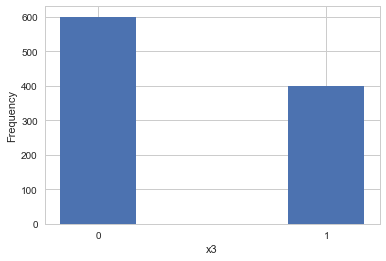

In [43]:
figure = plt.figure()

axes = figure.add_subplot(1, 1, 1)
axes.bar([0,1], data['x3'].value_counts(), width=1/3, tick_label=['0','1'], align='center')
axes.set_ylabel('Frequency')
axes.set_xlabel('x3')

plt.show()
plt.close()

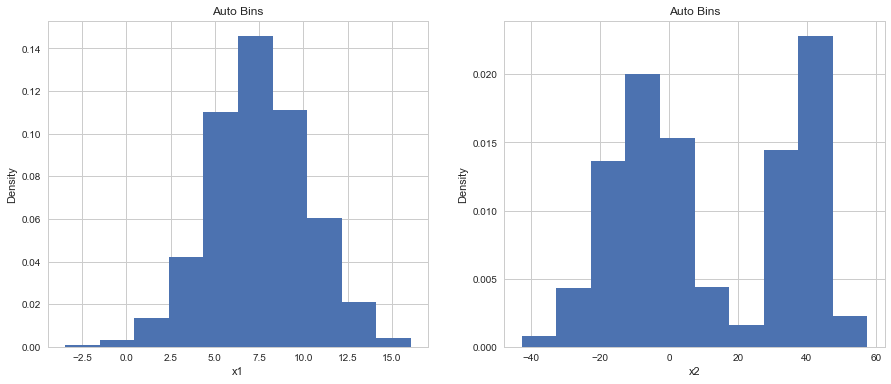

In [44]:
figure = plt.figure(figsize=(15, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(data['x1'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x1')
axes.set_title('Auto Bins')

axes = figure.add_subplot(1, 2, 2)
axes.hist(data['x2'], normed=True)
axes.set_ylabel('Density')
axes.set_xlabel('x2')
axes.set_title('Auto Bins')

plt.show()
plt.close()

The histogram indicates x1 is normally distributed while x2 seems to have two parts with the lower part normally distributed.

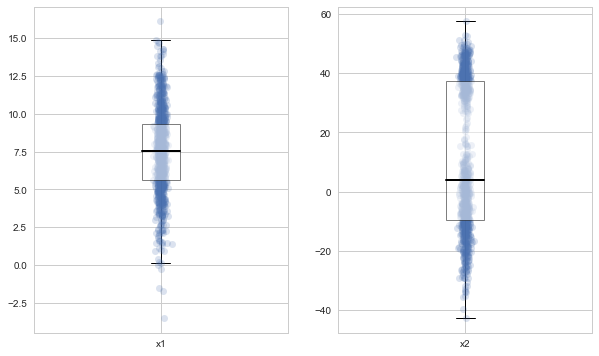

In [45]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot(data['x1'], labels=['x1'], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x1']))
axes.plot(x, data['x1'], 'o', alpha=0.2)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot(data['x2'], labels=['x2'], patch_artist=True)
restyle_boxplot(patch)
x = np.random.normal(1, 0.01, size=len(data['x2']))
axes.plot(x, data['x2'], 'o', alpha=0.2)

plt.show()
plt.close()

The box-and-whisker's indicates x1's distribution close to normal distribution. It again shows the division of x2 around 20 into two parts. This could explain the poor correlation between the two.

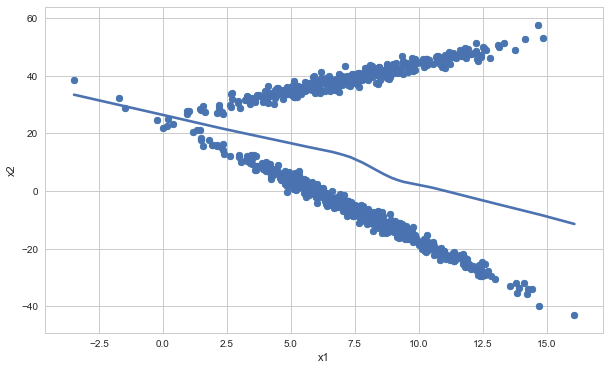

In [46]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(data['x1'], data['x2'], marker="o", color="steelblue")
sns.regplot(x="x1", y="x2", data=data, lowess=True)
axes.set_ylabel('x2')
axes.set_xlabel('x1')
plt.show()
plt.close()

The scatter plot implies there are possibly two correlations between x1 and x2 as there are two distinct partitions of data. The top part indicates a positive linear correlation while the bottom part a stronger negative linear correlation. These two result in an overall negative correlation as the LOESS trendline confirms.